In [ ]:
#Importing the data
import pandas as pd
df = pd.read_csv('/content/german_credit_data.csv')

## Understanding the data
- **Age** (numeric)
- **Sex** (text: male, female)
- **Job** (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- **Housing** (text: own, rent, or free)
- **Saving accounts** (text - little, moderate, quite rich, rich)
- **Checking account** (numeric, in DM - Deutsch Mark)
- **Credit amount** (numeric, in DM)
- **Duration** (numeric, in month)
- **Purpose** (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
- **Risk** (good - not defaulting, bad - defaulting)

In [ ]:
# check dataframe
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
# data structure
df.shape

(1000, 11)

In [ ]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [ ]:
# Summary Statistics
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


# Data Preprocessing:



In [ ]:
# check data size and Missings values,type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


#### The columns seem to be pretty consistent however, to ensure easy to reference, making all the columns to lowercase and add an underscore between spaces


In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
len(df.columns)

11

In [ ]:
# Convert to lower case
df.columns = df.columns.str.lower()

In [ ]:
# Replace Spaces with Underscores
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.columns

Index(['unnamed:_0', 'age', 'sex', 'job', 'housing', 'saving_accounts',
       'checking_account', 'credit_amount', 'duration', 'purpose', 'risk'],
      dtype='object')

### Dealing with Missing Values
Altough `saving_account` and `checking_acount` are usually continous values, in this case they are categorical variable and are classified by `little`, `moderate`, `quite rich`, and`rich`. Which means for this case, it is appropriate to handle missing value by replacing them with the mode (most frequent category).

In [ ]:
df['checking_account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [ ]:
df.isnull().sum()

unnamed:_0            0
age                   0
sex                   0
job                   0
housing               0
saving_accounts     183
checking_account    394
credit_amount         0
duration              0
purpose               0
risk                  0
dtype: int64

In [ ]:
df['checking_account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [ ]:
df['saving_accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [ ]:
# Creating a copy of the datafram to ensure data integrity

df_imputed = df.copy()

In [ ]:
df_imputed.head()

,unnamed:_0,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df['checking_account'].value_counts()

checking_account
little      274
moderate    269
rich         63
Name: count, dtype: int64

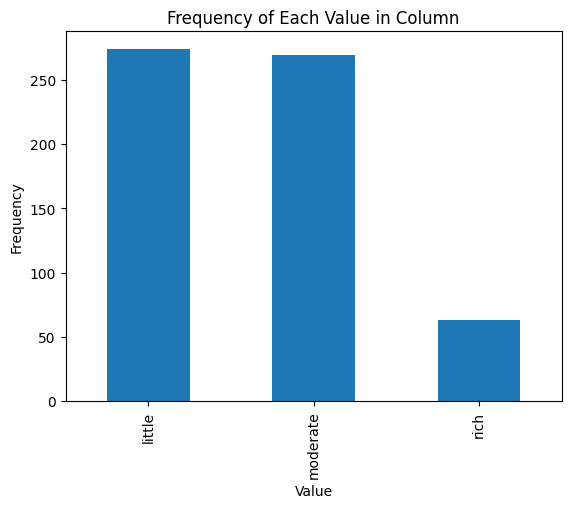

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df['checking_account'].value_counts().plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Each Value in Column')
plt.show()

In [ ]:
df['saving_accounts'].value_counts()

saving_accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

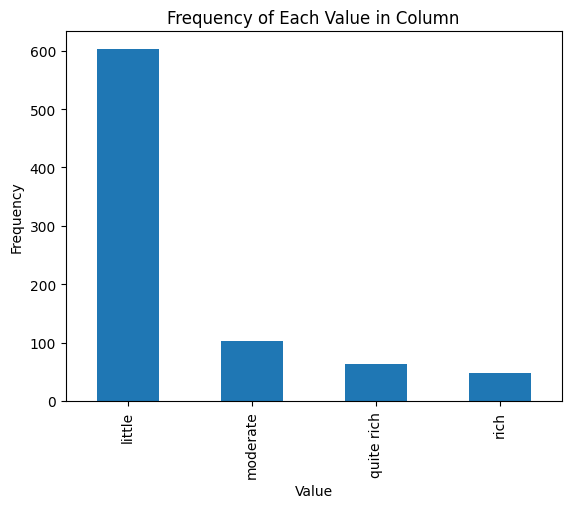

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df['saving_accounts'].value_counts().plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Each Value in Column')
plt.show()

In [ ]:
# Replace all NaN values in 'saving_accounts' with the mode: 'little'
df_imputed['checking_account'].fillna('little', inplace=True)

# Check the first few entries to ensure the change has been applied
print(df_imputed['checking_account'].head())

0      little
1    moderate
2      little
3      little
4      little
Name: checking_account, dtype: object


In [ ]:
# Replace all NaN values in 'saving_accounts' with the mode: 'little'
df_imputed['saving_accounts'].fillna('little', inplace=True)

# Check the first few entries to ensure the change has been applied
print(df_imputed['saving_accounts'].head())


0    little
1    little
2    little
3    little
4    little
Name: saving_accounts, dtype: object


In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   unnamed:_0        1000 non-null   int64 
 1   age               1000 non-null   int64 
 2   sex               1000 non-null   object
 3   job               1000 non-null   int64 
 4   housing           1000 non-null   object
 5   saving_accounts   1000 non-null   object
 6   checking_account  1000 non-null   object
 7   credit_amount     1000 non-null   int64 
 8   duration          1000 non-null   int64 
 9   purpose           1000 non-null   object
 10  risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


## Data Tranformation:

In [ ]:
# Replace 'good' with 0 and 'bad' with 1 in the 'risk' column
df_imputed['risk'] = df_imputed['risk'].replace({'good': 0, 'bad': 1})

# Display the DataFrame to confirm the changes
print(df_imputed['risk'].head())

0    0
1    1
2    0
3    0
4    1
Name: risk, dtype: int64


In [ ]:
# Dropping unnamed:_0 columns because it is unnecessary for building our model
# and could increase error
df_imputed = df_imputed.drop('unnamed:_0', axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Selects all the columns that are object data types
# Select categorical columns using select_dtypes
categorical_cols = df_imputed.select_dtypes(include=['object']).columns
categorical_cols

Index(['sex', 'housing', 'saving_accounts', 'checking_account', 'purpose'], dtype='object')

In [ ]:
# Initialize the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first')# Initialize the OneHotEncoder

In [ ]:
df_imputed[categorical_cols]

,sex,housing,saving_accounts,checking_account,purpose
0,male,own,little,little,radio/TV
1,female,own,little,moderate,radio/TV
2,male,own,little,little,education
3,male,free,little,little,furniture/equipment
4,male,free,little,little,car
...,...,...,...,...,...
995,female,own,little,little,furniture/equipment
996,male,own,little,little,car
997,male,own,little,little,radio/TV
998,male,free,little,little,radio/TV


In [ ]:
# Fit and transform the selected columns
ohe_cols = ohe.fit_transform(df_imputed[categorical_cols])

In [ ]:
# Get the feature names for the one-hot encoded columns
ohe_feature_name = ohe.get_feature_names_out(input_features=categorical_cols)
ohe_feature_name

array(['sex_male', 'housing_own', 'housing_rent',
       'saving_accounts_moderate', 'saving_accounts_quite rich',
       'saving_accounts_rich', 'checking_account_moderate',
       'checking_account_rich', 'purpose_car',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/TV',
       'purpose_repairs', 'purpose_vacation/others'], dtype=object)

In [ ]:
# Create a DataFrame with the encoded columns
ohe_df = pd.DataFrame(ohe_cols, columns=ohe_feature_name)
ohe_df

,sex_male,housing_own,housing_rent,saving_accounts_moderate,saving_accounts_quite rich,saving_accounts_rich,checking_account_moderate,checking_account_rich,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Concatenate the original DataFrame and the encoded DataFrame
df_imputed_ohe = pd.concat([df_imputed, ohe_df], axis=1)
df_imputed_ohe

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,...,saving_accounts_rich,checking_account_moderate,checking_account_rich,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,67,male,2,own,little,little,1169,6,radio/TV,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49,male,1,own,little,little,2096,12,education,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,53,male,2,free,little,little,4870,24,car,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,40,male,3,own,little,little,3857,30,car,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,38,male,2,own,little,little,804,12,radio/TV,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,23,male,2,free,little,little,1845,45,radio/TV,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_imputed_ohe = df_imputed_ohe.drop(categorical_cols, axis=1)

In [ ]:
df_imputed_ohe.head()

,age,job,credit_amount,duration,risk,sex_male,housing_own,housing_rent,saving_accounts_moderate,saving_accounts_quite rich,saving_accounts_rich,checking_account_moderate,checking_account_rich,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,67,2,1169,6,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,22,2,5951,48,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49,1,2096,12,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45,2,7882,42,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,53,2,4870,24,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Before we can train any machine learning model, we need to process the data. This means setting up our feature matrix, often labeled as **X**, and our target vector, labeled as **y**.

**Feature Matrix (**X**):** This matrix contains the data for all the predictor variables. Each column in **X** represents a different feature, and each row represents a different observation.

**Target Vector (**y**):** This vector contains the actual outcomes we are trying to predict. For our classification task, this will be the 'Defaulted' column.


In [ ]:
# Feature matrix (all columns except 'Defaulted')
X = df_imputed_ohe.drop('risk', axis=1)

# Target vector (only 'Defaulted' column)
y = df_imputed_ohe['risk']

In [ ]:
X.head()

,age,job,credit_amount,duration,sex_male,housing_own,housing_rent,saving_accounts_moderate,saving_accounts_quite rich,saving_accounts_rich,checking_account_moderate,checking_account_rich,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,67,2,1169,6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,22,2,5951,48,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49,1,2096,12,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45,2,7882,42,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,53,2,4870,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting the Data

We need to divide our dataset into two parts: a **training set** and a **testing set**.

- **Training Set:** Used to train our model.
- **Testing Set:** Used to evaluate the model's performance on unseen data.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#changing 'df_imputed_ohe' to 'data_numeric' since all our data is numeric
data_numeric = df_imputed_ohe
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1000 non-null   int64  
 1   job                          1000 non-null   int64  
 2   credit_amount                1000 non-null   int64  
 3   duration                     1000 non-null   int64  
 4   risk                         1000 non-null   int64  
 5   sex_male                     1000 non-null   float64
 6   housing_own                  1000 non-null   float64
 7   housing_rent                 1000 non-null   float64
 8   saving_accounts_moderate     1000 non-null   float64
 9   saving_accounts_quite rich   1000 non-null   float64
 10  saving_accounts_rich         1000 non-null   float64
 11  checking_account_moderate    1000 non-null   float64
 12  checking_account_rich        1000 non-null   float64
 13  purpose_car        

In [ ]:
# Standard Scaling
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## Building our models


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the models and their parameters for GridSearchCV

models_params = {
    'KNN' : {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'DecisionTree': {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20]},
    'LogisticRegression': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    'MLPClassifier':{'hidden_layer_sizes': [(10, 30, 10), (20, 50, 20)],'activation': ['tanh', 'relu']},
}

In [ ]:
from pickle import EMPTY_LIST
# Create dict to hold best models
best_models = {}

# Loop through the models and perform GridSearchCV
for model_name, params in models_params.items():
  if model_name == 'KNN':
    model = KNeighborsClassifier()
  elif model_name == 'DecisionTree':
    model = DecisionTreeClassifier()
  elif model_name == 'LogisticRegression':
    model = LogisticRegression()
  elif model_name == 'MLPClassifier':
    model = MLPClassifier()

  grid_search = GridSearchCV(model, params, cv=5)
  grid_search.fit(X_train, y_train)

  # Store the best model in the best_models dict with the model_names as the key
  best_models[model_name] = grid_search.best_estimator_

  # Print the best parameters found by GridSearchCV
  print(f"Model: {model_name}")
  print(f"Best Parameters: {grid_search.best_params_}")


Model: KNN
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Model: DecisionTree
Best Parameters: {'criterion': 'entropy', 'max_depth': 10}
Model: LogisticRegression
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Model: MLPClassifier
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (10, 30, 10)}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Importing our Perfomance Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [ ]:
# Define a function to valuate model performance

def evaluate_model(model, model_name, X_test, y_test):
  # Make predictions
  y_pred = model.predict(X_test)

  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  # Generate confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # Store evaluation matrics in a list
  metrics_list = [accuracy, precision, recall, f1, cm]

  return metrics_list

In [ ]:
best_models.items()

dict_items([('KNN', KNeighborsClassifier(n_neighbors=7, weights='distance')), ('DecisionTree', DecisionTreeClassifier(criterion='entropy', max_depth=10)), ('LogisticRegression', LogisticRegression(C=0.1, solver='liblinear')), ('MLPClassifier', MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 30, 10)))])

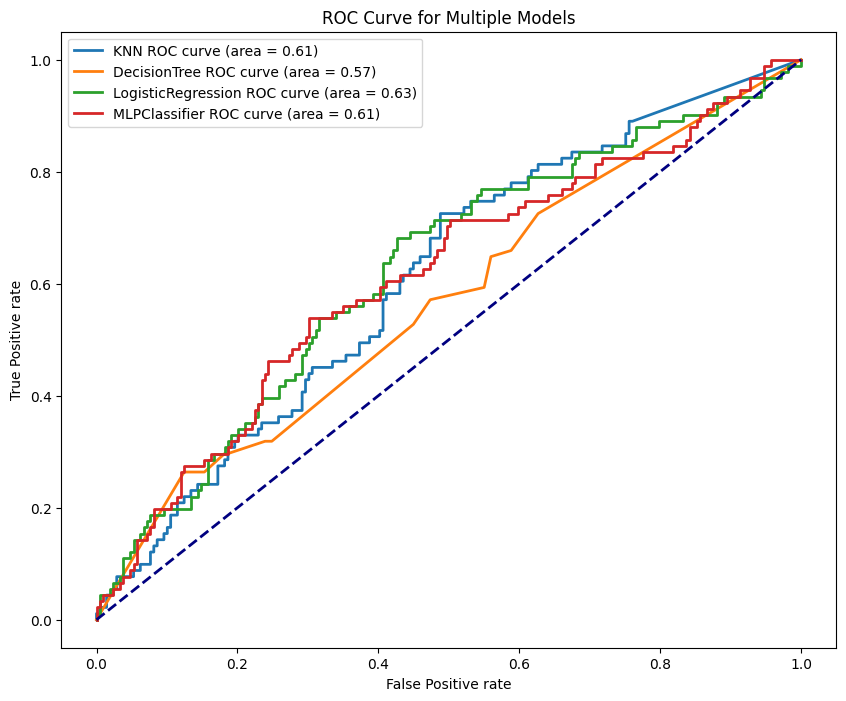

In [ ]:
import matplotlib.pyplot as plt

# Create  an empty dict to store evaluation metrics
eval_summary = {}

# Create a figure
plt.figure(figsize=(10,8))

# Loop through each model in the best_models dict and evaluate
for model_name, model in best_models.items():
  # Evaluate the model
  metrics_list = evaluate_model(model, model_name, X_test, y_test)

  # Store evaluation metrics in eval_summary dict
  eval_summary[model_name] = {
      'Accuracy': f"{metrics_list[0]:.2f}",
      'Precision': f"{metrics_list[1]:.2f}",
      'Recall': f"{metrics_list[2]:.2f}",
      'F1-Score': f"{metrics_list[3]:.2f}"
  }

  # Obtain probabilities for the ROC Curve
  y_probs = model.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_probs)
  roc_auc = auc(fpr, tpr)

  # plot ROC curve for
  plt.plot(fpr, tpr, lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

# Add Diagonal line
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve for Multiple Models')
plt.legend()

The Receiver Operating Characteristic (ROC) is a graphical representation used to assess the performance of classification models at various threshold settings. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.

1. **Lines on the Graph**:
   - **KNN (Blue)**: The K-Nearest Neighbors model has an area under the curve (AUC) of 0.61. This suggests it performs slightly better than random guessing but not by a significant margin.
   - **Decision Tree (Green)**: The Decision Tree model has an AUC of 0.58, which is quite close to the AUC of 0.5 that represents random chance. This indicates the model is not performing well in distinguishing between the classes.
   - **Logistic Regression (Orange)**: The Logistic Regression model shows an AUC of 0.63, which is the highest among the models  and suggests a moderate ability to discriminate between positive and negative classes.
   - **MLPClassifier (Red)**: The Multi-layer Perceptron classifier has an AUC of 0.61, which is comparable to the KNN and suggests fair performance.

2. **Overall Performance**:
   - The fact that all the AUC values are fairly close to 0.5 (especially the Decision Tree) indicates that none of these models have very strong predictive power for this particular task.
   - The Logistic Regression model is the best among those plotted, but with an AUC of only 0.63, there's still a lot of room for improvement.

3. **Diagonal Dashed Line (Blue Dashed)**:
   - The diagonal dashed line represents a no-skill classifier that would be correct 50% of the time (essentially random guessing). Ideally, the ROC curve of a good model should be as far away from this line as possible towards the top left corner.

In summary, this ROC curve analysis shows that our models can separate the classes better than random chance but are not highly accurate. The Logistic Regression model is slightly leading in this comparison, but given the context of such a critical task, these models might benefit from further tuning or exploring more sophisticated algorithms.

In [ ]:
eval_summary

{'KNN': {'Accuracy': '0.68',
  'Precision': '0.44',
  'Recall': '0.19',
  'F1-Score': '0.26'},
 'DecisionTree': {'Accuracy': '0.67',
  'Precision': '0.43',
  'Recall': '0.26',
  'F1-Score': '0.33'},
 'LogisticRegression': {'Accuracy': '0.69',
  'Precision': '0.46',
  'Recall': '0.20',
  'F1-Score': '0.28'},
 'MLPClassifier': {'Accuracy': '0.67',
  'Precision': '0.44',
  'Recall': '0.29',
  'F1-Score': '0.35'}}

In [ ]:
pd.DataFrame(eval_summary).T

,Accuracy,Precision,Recall,F1-Score
KNN,0.68,0.44,0.19,0.26
DecisionTree,0.67,0.43,0.26,0.33
LogisticRegression,0.69,0.46,0.20,0.28
MLPClassifier,0.67,0.44,0.29,0.35




The classification report is a summary of the performance of a classification model. It provides important metrics that help evaluate how well the model is performing in terms of classifying different categories or classes. The report includes the following metrics:

- **Precision**: Precision is the ratio of true positive predictions to the total number of positive predictions. It measures the accuracy of positive predictions and tells us how many of the predicted positive instances were actually positive.
  - In our case, the model that scored the highest Precision is `Logistic Regression` with a `46%`. In short this means that out of all the predicted positve cases class 46% of them are true positive.

- **Recall**: Recall also known as sensitivity is the ratio of true positive predictions to the total number of actual positive instances. It measures the model's ability to correctly identify all positive instances.
  - `MLP Classifier` correctly identified `29%` of all actual positive cases

- **F1-Score**: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance, considering both false positives and false negatives.
  - The highest F-1 Score in our case is `MLP Classifier` with `35%`.

- **Accuracy**: Accuracy is the overall percentage of correctly classified instances. It measures the model's overall performance.
  - Finally the highest Accuracy among our model is is `Logistic Regression` with a `69%` correcly classified values.

The classification report is a valuable tool for assessing the model's performance, especially in cases with imbalanced datasets or when different classes have varying levels of importance. It helps us understand how well the model is distinguishing between classes and where it may need improvement.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Predictions on training data
y_train_pred = grid_search.best_estimator_.predict(X_train)

# Compute training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Testing Accuracy:", accuracy_score(y_train, y_train_pred))

Testing Accuracy: 0.8042857142857143


In [ ]:
feature_names = [
    "age", "job", "credit_amount", "duration",
    "sex_male", "housing_own", "housing_rent",
    "saving_accounts_moderate", "saving_accounts_quite rich", "saving_accounts_rich",
    "checking_account_moderate", "checking_account_rich",
    "purpose_car", "purpose_domestic appliances", "purpose_education",
    "purpose_furniture/equipment", "purpose_radio/TV", "purpose_repairs", "purpose_vacation/others"
]


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Model: KNN


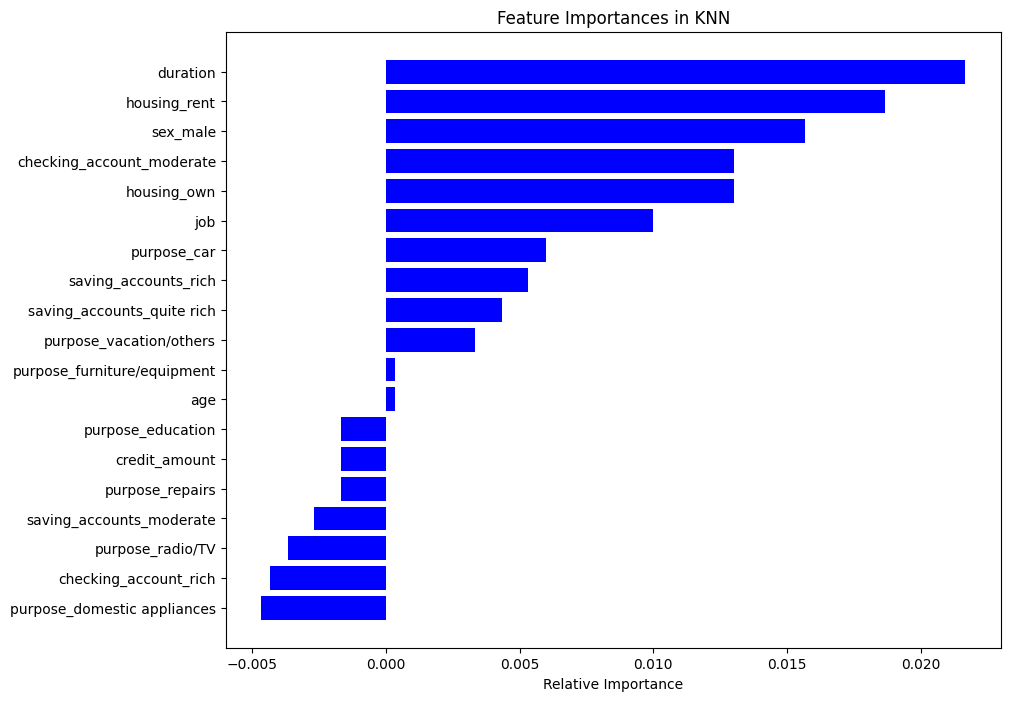

Model: DecisionTree


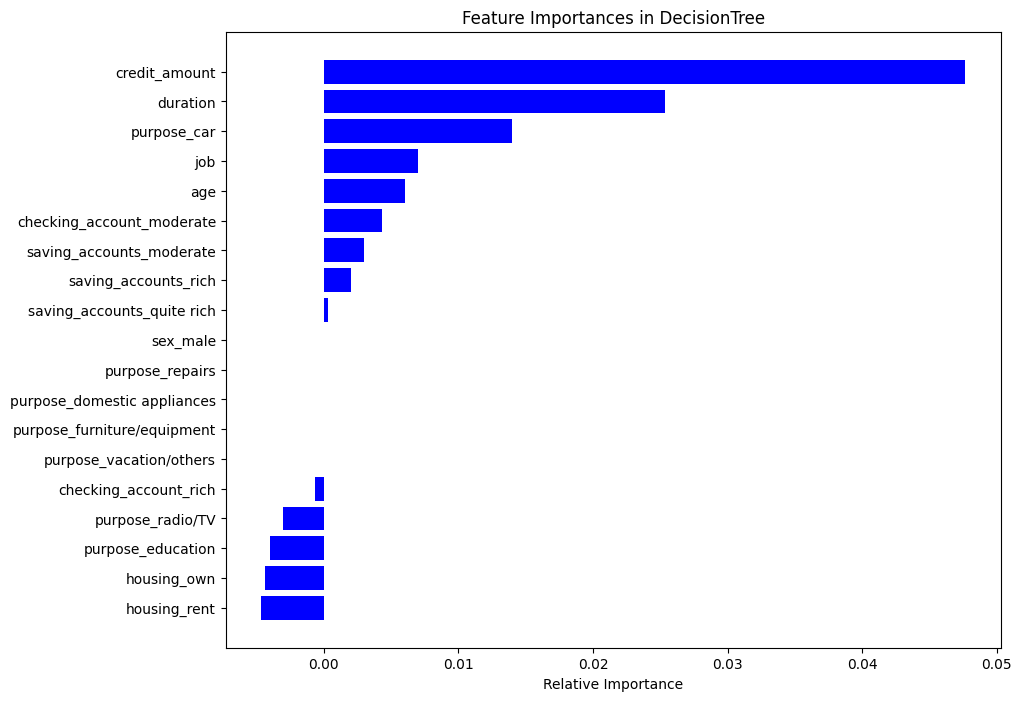

Model: LogisticRegression


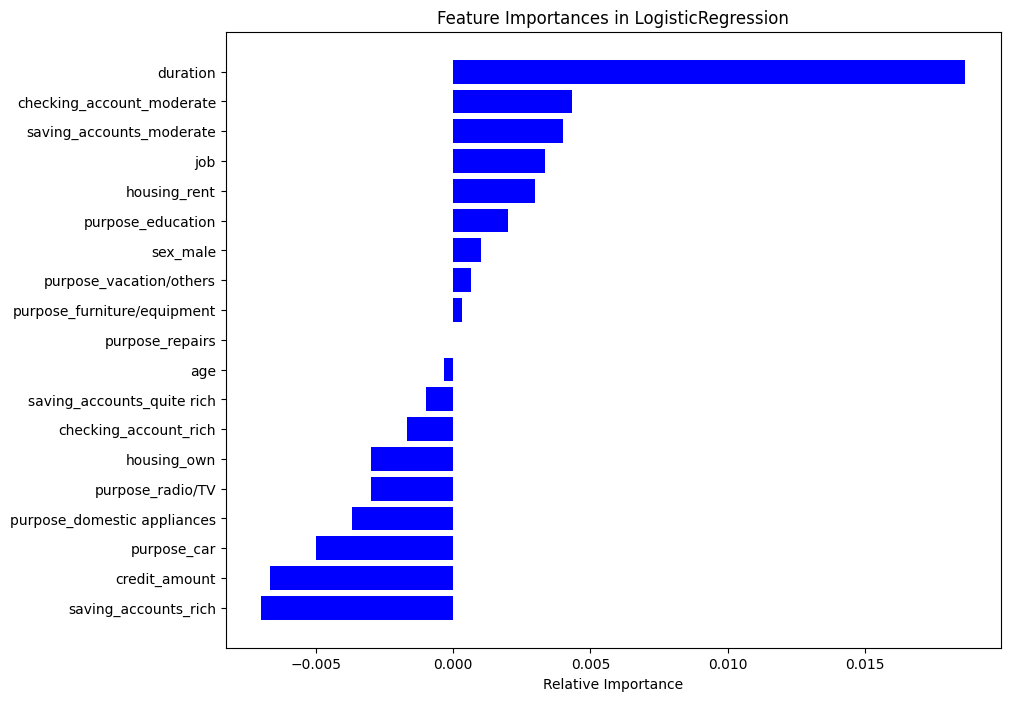

Model: MLPClassifier


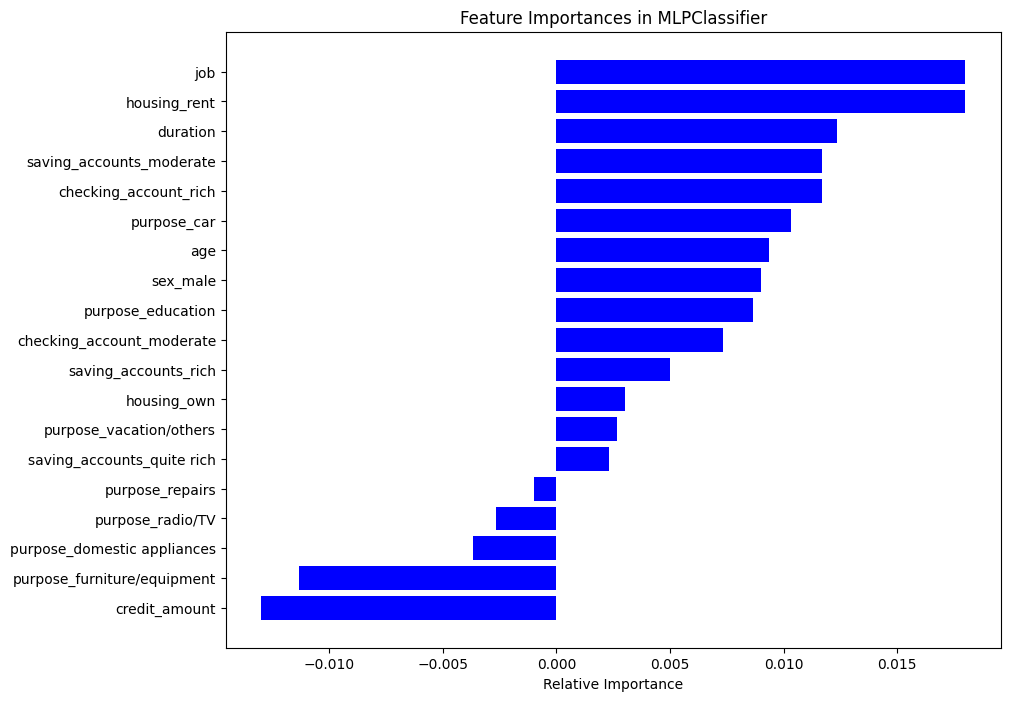

In [ ]:
# Feature Importance

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Create a function to plot feature importance
def plot_feature_importance(importances, features, model_name):
    indices = np.argsort(importances)
    plt.figure(figsize=(10, 8))
    plt.title(f'Feature Importances in {model_name}')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# Calculate and plot feature importance for each model
for model_name, model in best_models.items():
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    print(f"Model: {model_name}")
    plot_feature_importance(result.importances_mean, feature_names, model_name)


The feature importance charts indicate how each model prioritizes the impact of different features on the predictions.

### K-Nearest Neighbors (KNN):
- **Duration** and **housing_rent** are the most significant features. This suggests that factors related to the term of the loan and living situation are critical in the KNN model’s predictions.
- **Sex_male** and **checking_account_moderate** also show notable importance, indicating gender and moderate checking account status influence the model's decision.

### Decision Tree:
- **Credit_amount** stands out as the most impactful feature, likely because it's a crucial determinant of credit risk.
- **Duration** and **purpose_car** are also important, suggesting that loan term and car-related purposes play a significant role in the tree's decisions.

### Logistic Regression:
- **Duration** again comes up as highly influential, along with **checking_account_moderate**. Logistic regression seems to weight these two features heavily, which could mean they have a strong linear relationship with the outcome.
- **Saving_accounts_moderate** and **job** appear to be moderately important, which might be linearly separable features in the context of logistic regression.

### Multi-layer Perceptron Classifier (MLP):
- **Job** and **housing_rent** are the top two, suggesting these features have complex interactions or nonlinear relationships with the outcome that the MLP can capture.
- **Duration** remains consistently significant, while **saving_accounts_moderate** and **checking_account_rich** are also key factors according to the MLP model.

### General Analysis:
- The importance of **duration** across all models underscores its relevance in credit modeling.
- The **credit amount** has varied importance, but when it is significant, it's usually one of the top factors, indicating its critical role in certain models.
- Features related to **savings and checking accounts** fluctuate in importance, potentially highlighting different financial behaviors or stability indicators that some models pick up on more than others.
- Notably, certain **purposes of the loan** (like car and radio/TV) fluctuate in their importance across models, suggesting that the reason for the loan may only sometimes be a strong predictor or may interact with other features in ways that are model-dependent.